In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_25205_G')

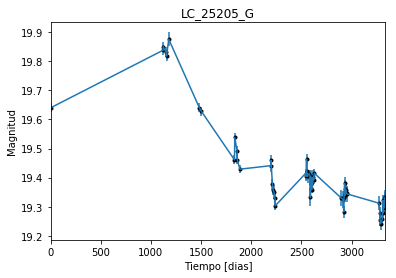

In [2]:
data = np.genfromtxt('LC_25205_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_25205_G')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

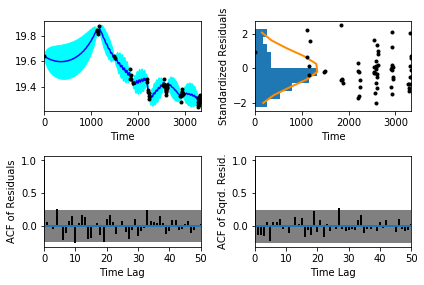

In [5]:
sample.assess_fit()

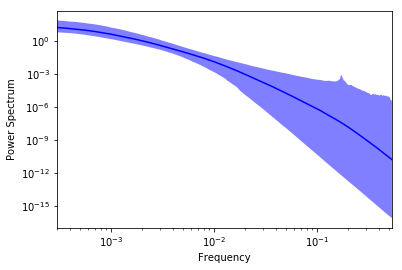

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_25205_G')

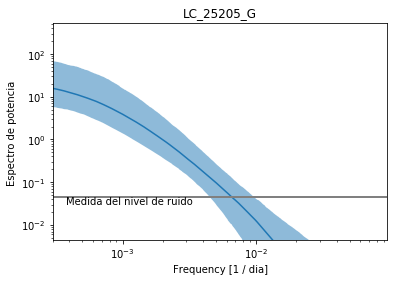

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_25205_G')

Text(0.5,1,'Prediccion , valor esperado LC_25205_G')

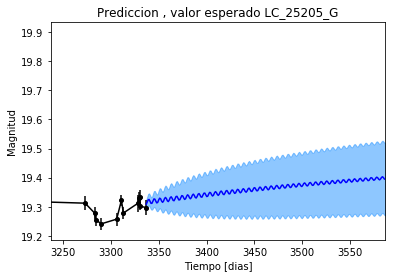

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_25205_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_25205_G')

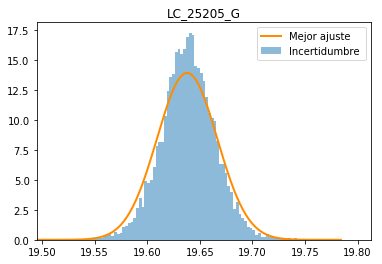

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_25205_G')

Text(0.5,1,'Interpolacion, camino simulado LC_25205_G')

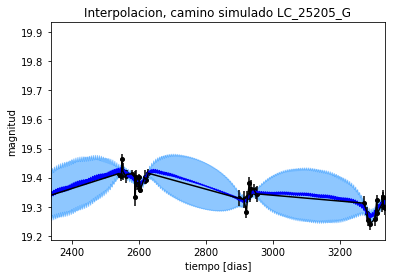

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_25205_G')


Text(0.5,1,'Interpolacion, camino simulado LC_25205_G')

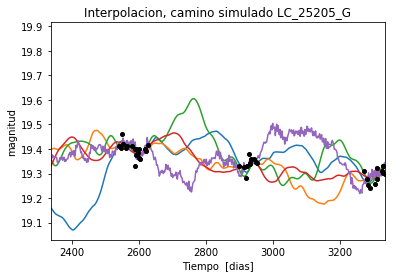

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_25205_G')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 697.045960134
Median: 0.023958149332
Standard deviation: 0.226294329876
68% credibility interval: [ 0.00145073  0.27771366]
95% credibility interval: [  3.35832016e-04   8.64367966e-01]
99% credibility interval: [  3.06607597e-04   1.03420988e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 398.586716319
Median: 0.00332099424909
Standard deviation: 0.0811019073978
68% credibility interval: [ 0.00045854  0.02917423]
95% credibility interval: [ 0.00031557  0.26749119]
99% credibility interval: [  3.02297706e-04   5.67910544e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 390.543313663
Median: 0.0251315656151
Standard d

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 601.246391536
Median: 142.525172304
Standard deviation: 1.95479150395
68% credibility interval: [ 140.38756516  144.05323581]
95% credibility interval: [ 137.88448784  145.45850181]
99% credibility interval: [ 135.7336512   147.28692521]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 711.980276825
Median: 0.861054593268
Standard deviation: 2.3313363581
68% credibility interval: [ 0.0876841   4.33094202]
95% credibility interval: [ 0.02346355  7.82860737]
99% credibility interval: [  0.01237401  10.67842671]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 597.772029205
Median: 0.957246104337
Standard deviation: 9.46855755413
68% credibility interval: [ 0.06999747  9.19604502]
95% credibility interval: [  4.84721946e-

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 12449.93584
Median: 1.47605218998e-33
Standard deviation: 2.47299028806e+110
68% credibility interval: [  2.66545533e-52   2.36987740e-05]
95% credibility interval: [  6.08798540e-84   1.93330337e+01]
99% credibility interval: [  4.46342823e-90   1.84868647e+53]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2121.20801354
Median: 19.5192725107
Standard deviation: 0.0963521633228
68% credibility interval: [ 19.43713608  19.60617073]
95% credibility interval: [ 19.33392939  19.72801207]
99% credibility interval: [ 19.24509321  19.8241335 ]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 319.591048481
Median: 0.00893811270506
Standard deviation: 0.253946158753
68% credibility interval: [ 0.          0.37743832]
95% credibility interval: [ 0.          0.92953306]
99% credibility interval: [ 0.          1.02693428]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 319.591048481
Median: 0.00893811270506
Standard deviation: 0.253946158753
68% credibility interval: [ 0.          0.37743832]
95% credibility interval: [ 0.          0.92953306]
99% credibility interval: [ 0.          1.02693428]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1486.15424273
Median: 0.0
Standard deviation: 0.000209902844646
68% 

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 601.246391536
Median: 142.525172304
Standard deviation: 1.95479150395
68% credibility interval: [ 140.38756516  144.05323581]
95% credibility interval: [ 137.88448784  145.45850181]
99% credibility interval: [ 135.7336512   147.28692521]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1056.02311256
Median: 0.0318838787507
Standard deviation: 0.034876776457
68% credibility interval: [ 0.01994927  0.05916321]
95% credibility interval: [ 0.01308983  0.12470267]
99% credibility interval: [ 0.01009311  0.21261494]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1141.07745466
Median: 1.16961762525
Standard deviation: 0.202752780124
68% credibility interval: [ 0.98537551  1.37991119]
95% credibility interval: [ 0.8267663   1.62679861]
99% credibility interval: [ 0.73092129  1.78334571]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 423.348954586
Median: 0.000495421324785
Standard deviation: 0.137691478633
68% credibility interval: [  2.40380439e-05   8.61278804e-03]
95% credibility interval: [  4.09625076e-07   1.40163789e-01]
99% credibility interval: [  4.80577808e-57   1.00690533e+00]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 697.045960134
Median: (-0.15053349187+0j)
Standard deviation: 2.13718625495
68% credibility interval: [-1.74492636+0.j         -0.00911521-0.40801298j]
95% credibility interval: [ -5.43098410e+00+0.j          -2.11009479e-03-1.11322799j]
99% credibility interval: [ -6.49813231e+00+0.j          -1.92647235e-03-1.33607713j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 398.586716319
Median: (-0.0208664222711+1.21584839657j)
Standard deviation: 1.67498655919
68% credibility interval: [-0.18330708+6.34874707j -0.00288111+0.j        ]
95% credibility interval: [-1.6806967+0.j         -0.0019828+0.00096142j]
99% credibility interval: [ -3.56828718e+00+1.04955171j  -1.89939250e-03+1.37913397j]
Posterior summary for paramete